# Reporte de MLT de Barcelona Telco

## Problema ha solucionar


## Data

In [17]:
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/PROYECTO_FINAL/Datasets/Combined%20Cycle%20Power%20Plant/Folds5x2_pp.csv',header=0,sep=';')
print(df.shape)

(9568, 5)


In [16]:
df.rename(columns={'AT':'Temperatura','V':'Escape','AP':'PresionAmbiente','RH':'HumedadRelativa','PE':'Electricidad'}, inplace=True)
df.head(2)

,Temperatura,Escape,PresionAmbiente,HumedadRelativa,Electricidad
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75


## Data Exploration

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,Temperatura,Escape,PresionAmbiente,HumedadRelativa,Electricidad
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


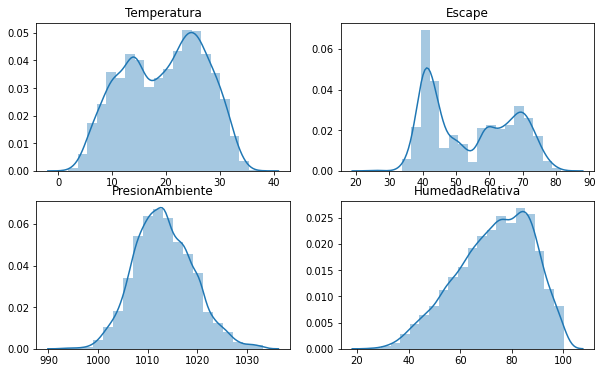

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(221)
ax = sns.distplot(df["Temperatura"].values,bins=20)
ax.set_title('Temperatura')
ax1 = fig.add_subplot(222)
ax1 = sns.distplot(df["Escape"].values,bins=20)
ax1.set_title('Escape')
ax2 = fig.add_subplot(223)
ax2 = sns.distplot(df["PresionAmbiente"].values,bins=20)
ax2.set_title('PresionAmbiente')
ax3 = fig.add_subplot(224)
ax3 = sns.distplot(df["HumedadRelativa"].values,bins=20)
ax3.set_title('HumedadRelativa')
plt.show()

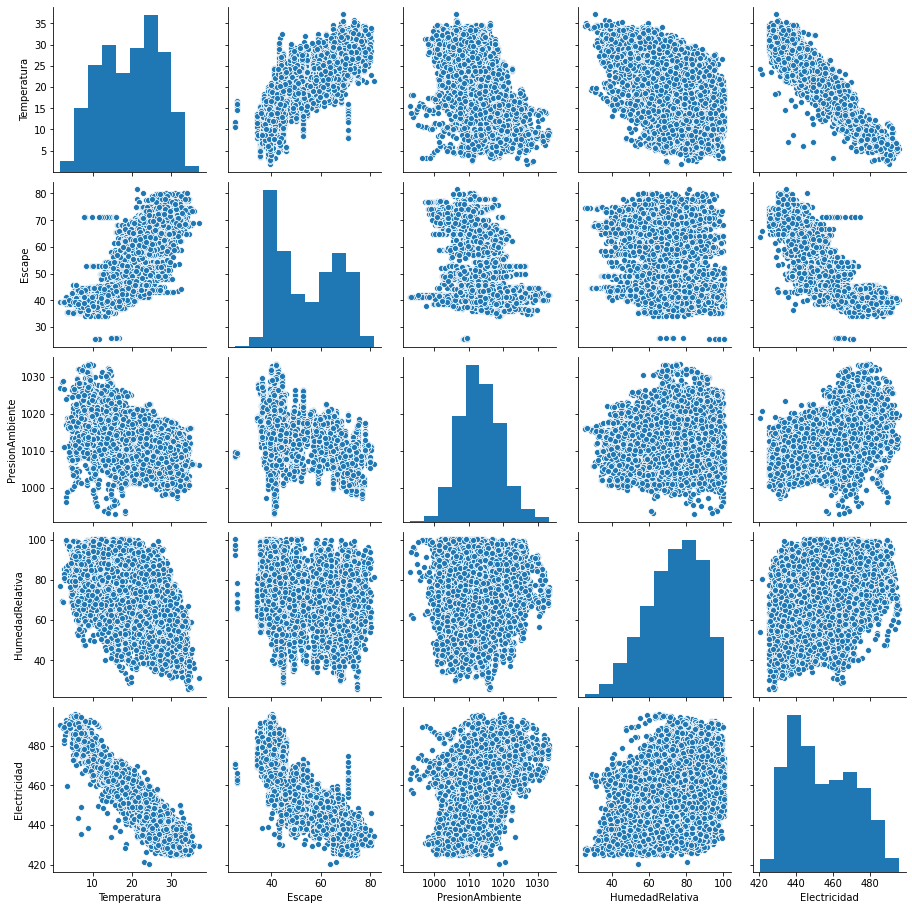

In [12]:
sns.pairplot(df)
plt.show()

## Algoritmo de Machine Learning

### Con todas las features

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Y = df['Electricidad']
data = df.drop(['Electricidad'],axis=1)

X = data.values

X, Y = shuffle(X,Y)
X_meteo, Y = shuffle(X_meteo,Y)

X_train = []
y_train = []
X_test = []
y_test = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,random_state=20)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print("Rangos Data")
print(X_train.shape)
print(X_test.shape)

### Sin la feature de presión de escape

In [ ]:
data_meteo = data.drop(['Escape'],axis=1)

X_meteo = data_meteo.values

X_meteo_train = []
X_meteo_test = []
y_meteo_train = []
y_meteo_test = []

X_meteo_train, X_meteo_test, y_meteo_train, y_meteo_test = train_test_split(X_meteo, Y, train_size=0.8,random_state=20)

X_meteo_train = np.array(X_meteo_train)
y_meteo_train = np.array(y_meteo_train)
X_meteo_test = np.array(X_meteo_test)
y_meteo_test = np.array(y_meteo_test)

sc_meteo = StandardScaler()
sc_meteo.fit(X_meteo_train)

X_meteo_train_std = sc_meteo.transform(X_meteo_train)
X_meteo_test_std = sc_meteo.transform(X_meteo_test)

print("Rangos Data Meteo")
print(X_meteo_train.shape)
print(X_meteo_test.shape)

## Resultados

### Con todas las features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

RFC = RandomForestRegressor(max_depth = 7, min_samples_split = 4, n_estimators = 300,random_state = 20, n_jobs = -1)
RFC.fit(X_train, y_train) 

In [ ]:
train_prediction = RFC.predict(X_train)
train_errors=abs(train_prediction - y_train)
print('Mean Absolute Error de Train:', round(np.mean(train_errors), 2), 'degrees.')
train_mape = 100 * (train_errors / y_train)
train_accuracy = 100 - np.mean(train_mape)
print('Train Accuracy:', round(train_accuracy, 2), '%.')
score_train = RFC.score(X_train,y_train)
print('Score: {}'.format(score_train))


test_prediction = RFC.predict(X_test)
test_errors=abs(test_prediction - y_test)
print('Mean Absolute Error de Test:', round(np.mean(test_errors), 2), 'degrees.')
test_mape = 100 * (test_errors / y_test)
test_accuracy = 100 - np.mean(test_mape)
print('Test Accuracy:', round(test_accuracy, 2), '%.')
score_test = RFC.score(X_test,y_test)
print('Score: {}'.format(score_test))

### Sin la feature de presión de escape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

RFC_meteo = RandomForestRegressor(max_depth = 10, min_samples_split = 8, n_estimators = 3000,random_state = 15, n_jobs = -1)
RFC_meteo.fit(X_meteo_train, y_meteo_train)

In [ ]:
train_meteo_prediction = RFC_meteo.predict(X_meteo_train)
train_meteo_errors=abs(train_meteo_prediction - y_meteo_train)
print('Mean Absolute Error de Train:', round(np.mean(train_meteo_errors), 2), 'degrees.')
train_meteo_mape = 100 * (train_meteo_errors / y_meteo_train)
train_meteo_accuracy = 100 - np.mean(train_meteo_mape)
print('Train Accuracy:', round(train_meteo_accuracy, 2), '%.')
score_train = RFC.score(X_train,y_train)
print('Score: {}'.format(score_train))


test_meteo_prediction = RFC_meteo.predict(X_meteo_test)
test_meteo_errors=abs(test_meteo_prediction - y_meteo_test)
print('Mean Absolute Error de Test:', round(np.mean(test_meteo_errors), 2), 'degrees.')
test_meteo_mape = 100 * (test_meteo_errors / y_meteo_test)
test_meteo_accuracy = 100 - np.mean(test_meteo_mape)
print('Test Accuracy:', round(test_meteo_accuracy, 2), '%.')
score_test = RFC.score(X_test,y_test)
print('Score: {}'.format(score_test))

 ## Discusión y Conclusiones

### Con todas las features

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(15,15))
ax = sns.regplot(y_test, test_prediction, color="r")
ax = sns.regplot(y_train, train_prediction, data=data,color="g")

### Sin la feature de presión de escape

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(15,15))
ax = sns.regplot(y_meteo_test, test_meteo_prediction, color="r")
ax = sns.regplot(y_meteo_train, train_meteo_prediction, data=data_meteo,color="g")

## Linias de desarrollo futuro

In [ ]:
import requests
api_url = 'http://api.openweathermap.org/data/2.5/weather?q=Ames&appid=c9acde17731d1859e92b163fcc54aaa4'
r = requests.get(api_url)
r.raise_for_status()
payload = r.json()
print(r)

temp = payload['main']['temp']
humidity = payload['main']['humidity']
pressure = payload['main']['pressure']
print("La temperatura actual de Ames es: {}ºK".format(temp))
print("La humedad actual de Ames es: {}%".format(humidity))
print("La presion actual de Ames es: {}".format(pressure))

### Annexo 1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
filename = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_GeneradorEnergia.pkl'
joblib.dump(RFC, filename)

filename_meteo = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_GeneradorEnergia_meteo.pkl'
joblib.dump(RFC_meteo, filename_meteo)

In [ ]:
RFC_meteo_load = joblib.load(filename_meteo)
RFC_load = joblib.load(filename)

### Annexo 2

In [ ]:
def predict_electricidad(escape,modelo):
  api_url = 'http://api.openweathermap.org/data/2.5/weather?q=Ames&appid=c9acde17731d1859e92b163fcc54aaa4'
  r = requests.get(api_url)
  r.raise_for_status()
  payload = r.json()

  temp = (payload['main']['temp'] - 273.15)
  hum = payload['main']['humidity']
  pres = payload['main']['pressure']
  print("Las condiciones de predicción actuales són:")
  print("     - Temperatura: {} ºC".format(temp))
  print("     - Humedad: {} %".format(hum))
  print("     - Presión: {} hPa".format(pres))

  valores_actuales = (np.array([temp, escape , humidity, pressure])).reshape(1,-1)
  electricidad = modelo.predict(valores_actuales)
  print("El valor esperado de Energia actualmente es de: {}".format(electricidad))
predict_electricidad(30,RFC_meteo_load)

In [ ]:
def predict_electricidad(escape,modelo):
  api_url = 'http://api.openweathermap.org/data/2.5/weather?q=Ames&appid=c9acde17731d1859e92b163fcc54aaa4'
  r = requests.get(api_url)
  r.raise_for_status()
  payload = r.json()

  temp = (payload['main']['temp'] - 273.15)
  hum = payload['main']['humidity']
  pres = payload['main']['pressure']
  print("Las condiciones de predicción actuales són:")
  print("     - Temperatura: {} ºC".format(temp))
  print("     - Humedad: {} %".format(hum))
  print("     - Presión: {} hPa".format(pres))

  valores_actuales = (np.array([temp, escape , humidity, pressure])).reshape(1,-1)
  electricidad = modelo.predict(valores_actuales)
  print("El valor esperado de Energia actualmente es de: {}".format(electricidad))
predict_electricidad(30,RFC_load)

imlpython.westeurope.cloudapp.azure.com:1880/ui